In [20]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def norma_L2(x):                          #pomocnicza funkcyjka
    kwadraty = x**2
    suma_kwadratow = np.sum(kwadraty)
    return np.sqrt(suma_kwadratow)


a = np.array([[4,1,0],
             [0,2,1],
             [0,0,-1]], dtype=float)
x = np.array([1.,1.,1.])
x = x/norma_L2(x) #normalizuję do 1
dokladnosc = 0.00000001


[ 0.57735027  0.57735027  0.57735027]	0.796077821492
[ 0.84515425  0.50709255 -0.16903085]	0.796077821492
[ 0.57735027  0.57735027  0.57735027]	1.41421356237
[ -3.39934989e-17   7.07106781e-01  -7.07106781e-01]	1.84775906502
[ -1.20185168e-17   0.00000000e+00   1.00000000e+00]	1.94365063162
[-0.11111111  0.44444444 -0.88888889]	1.98648633172
[ 0.03030303 -0.24242424  0.96969697]	1.99615003088
[-0.08020655  0.34999221 -0.93331257]	1.99905013192
[ 0.05398351 -0.29784006  0.95308818]	1.99975440722
[-0.06772303  0.32433344 -0.94351545]	1.99993882014
[ 0.06078008 -0.31119401  0.9484008 ]	1.99998457544
[-0.06429124  0.31778982 -0.945979  ]	1.99999614736
[ 0.06253119 -0.3144987   0.94719608]	1.99999903481
[-0.0634137   0.31614589 -0.94658886]	1.99999975876
[ 0.06297216 -0.31532272  0.94689286]	1.99999993966
[-0.06319309  0.31573441 -0.94674095]	1.99999998492
[ 0.06308261 -0.31552859  0.94681693]	1.99999999623
[-0.06313786  0.31563151 -0.94677894]	1.99999999906
[ 0.06311023 -0.31558005  0.9467

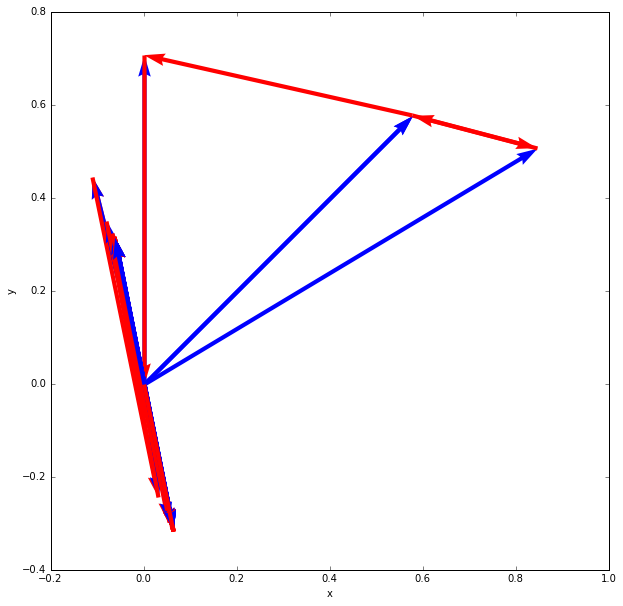

In [21]:

fig, axes = plt.subplots(figsize=(10,10))
axes.set_xlabel('x')
axes.set_ylabel('y')
# axes.set_xlim(0,1.2)
# axes.set_ylim(0,0.8)
axes.quiver(0,0,x[0], x[1], scale_units='xy', scale=1, angles='xy', color='blue')
x_next = a@x / norma_L2(a@x)           #pierdyknij macierzą i znormalizuj do 1
difference = x_next - x

iterations = 0
while(norma_L2(difference) > dokladnosc):    #dopóki długość wektora różnicy naszych dwóch
                                             #jest większa niż dokładność
                                             #to jest ten czerwony wektor
        
    print(x, norma_L2(x_next-x), sep='\t')   #jak wygląda nasz bieżący wektor?
    
    axes.quiver(x[0],x[1], difference[0], difference[1],scale_units='xy', scale=1, angles='xy', color='red')
    axes.quiver(0,0,x_next[0], x_next[1], scale_units='xy', scale=1, angles='xy', color='blue')

    x = x_next                               #wyrzucamy stary, przechodzimy do kolejnej 
    
    x_temp = lu(a,x)
    x_next = x_temp / norma_L2(x_temp)       #pierdyknij macierzą i znormalizuj do 1
    difference = x_next - x
    iterations += 1
    if iterations > 30:
        break
# Ax = lambda x
# skoro ||x|| = 1 to ||Ax|| = ||lambda x|| = ||lambda|| ||x|| = ||lambda||
# więc teraz jak długość x = 1 to długość Ax = lambda
print(lu(a,x)/x)

In [17]:
#dla porównania z analitycznym
eigvals, eigvecs = np.linalg.eig(np.linalg.inv(a))
for val, vec in zip(eigvals, eigvecs.T):      #z jakiegoś powodu eig zwraca wektory w kolumnach
    print(val, vec, sep = '\t')

#jak spojrzysz na ten pierwszy to zgadza się z tym co dostaliśmy

0.25	[ 1.  0.  0.]
0.5	[-0.4472136   0.89442719  0.        ]
-1.0	[ 0.06311944 -0.3155972   0.9467916 ]


In [ ]:
axes.quiver?

In [ ]:
np.linalg.inv(a)@[1,1,1]

In [15]:
from scipy.linalg import lu_solve, lu_factor
def lu(a, b):
    lu_matrix, piv = lu_factor(a)
    return lu_solve((lu_matrix, piv), b)

array([ 0.        ,  0.57735027, -0.57735027])

In [14]:
lu_factor?